# Jupyter Notebookで始めるプログラミング2019　演習問題　（１１章）

## 問11-1 モデルの分布

$x$、$y$、$z$は、次の表に示す確率分布を持つ確率変数です。

|       $x$ | $P(x)$:確率|
|:---- | :--: |
|       0 | 0.05|
|       1 | 0.10|
|       2 | 0.15|
|       3 | 0.20|
|       4 | 0.20|
|       5 | 0.15|
|       6 | 0.10|
|       7 | 0.05|

|$y$ | $P(y)$:確率|
|:---- | :--: |
|       2 | 0.20|
|       3 | 0.25|
|       4 | 0.25|
|       5 | 0.20|
|       6 | 0.10|

|$z$ | $P(z)$:確率 |
|:---- | :--: |
|      6 | 0.20|
|       7 | 0.45|
|       8 | 0.25|
|       9 | 0.10|

変数$w$が、
$w = 3x + 2y + z$
と表されるとします。

このとき、モンテカルロ法を用いて$w$の値を100,000回求めヒストグラムに表示し、その平均と分散を求めなさい

In [2]:
x = [0, 1, 2, 3, 4, 5, 6, 7] # 確率変数xとその確率分布
Px = [0.05, 0.10, 0.15, 0.20, 0.20, 0.15, 0.10,0.05]

In [3]:
y = [2, 3, 4, 5, 6] # 確率変数yとその確率分布
Py = [0.20, 0.25, 0.25 , 0.20, 0.10]

In [5]:
z = [6, 7, 8, 9] # 確率変数zとその確率分布
Pz = [0.20, 0.45, 0.25, 0.10]

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt # グラフを表示するための準備

In [15]:
import random # random.choices関数を利用するための準備

In [18]:
def f(x, Px, y, Py, z, Pz): # サンプルwiを計算する関数
    x_samples = random.choices(x, weights=Px, k=1)
    xi = x_samples[0]
    y_samples = random.choices(y, weights=Py, k=1)
    yi = y_samples[0]
    z_samples = random.choices(z, weights=Pz, k=1)
    zi = z_samples[0]

    wi = 3 * xi + 2 * yi + zi
    return wi

In [21]:
w = [] # リストwを用意し、サンプルを100,000個格納
for i in range(100000):
    wi = f(x, Px, y, Py, z, Pz)
    w.append(wi)
w.sort() # サンプルを小さな値の順にソート

(array([ 2210.,  5527., 10240., 15313., 18329., 23304., 12847.,  7826.,
         3470.,   934.]),
 array([10. , 13.2, 16.4, 19.6, 22.8, 26. , 29.2, 32.4, 35.6, 38.8, 42. ]),
 <a list of 10 Patch objects>)

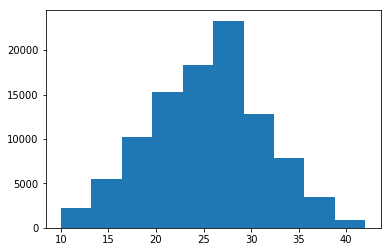

In [23]:
plt.hist(w) # ヒストグラムを作成

In [24]:
# サンプルの平均値 = サンプルの合計 / サンプルの個数
mean = sum(w) / len(w)
print(mean)

25.25794


(この値は、シミュレーションによって多少変化することがあります。)

In [27]:
# サンプルの分散 = 平均値との差分の2乗の合計 / サンプルの個数
var = 0
for i in range(100000):
    var = var + (w[i] - mean)*(w[i] - mean)
var = var/len(w)
print(var)

36.10302695640448


(この値は、シミュレーションによって多少変化することがあります。)

## 問11-2 1ヶ月の食事代の見積もり

1回の昼食代は確率的に表すことができると仮定して、1ヶ月（30日）間に必要な昼食代を、モンテカルロ法を使って見積もりなさい。

1回の昼食代$x$とその確率分布$P(x)$は、表に示す通りです。

|$x$:昼食1回の費用（円）| $P(x)$:確率|
|:---- | :--: |
|    0   | 0.13|
|    100 | 0.00|
|    200 | 0.00|
|    300 | 0.10|
|    400 | 0.23|
|    500 | 0.30|
|    600 | 0.17|
|    700 | 0.00|
|    800 | 0.07|

なお、「必要な昼食代」とは、99%の確率で不足することはない昼食代と解釈してください。また、30回分の昼食の値段を重複ありでランダムに選ぶには、$\verb|random.choices(x, weights=Px, k=30)|$を使いなさい。

In [28]:
# 確率変数xとその確率分布
x = [0, 100, 200, 300, 400, 500, 600, 700, 800]
Px = [0.13, 0.0, 0.0, 0.10, 0.23, 0.30, 0.17, 0.0, 0.07]

In [29]:
import random # random.choices関数を利用するための準備

In [30]:
# 1ヶ月の昼食代のサンプルを計算する関数
def LunchCost(x, Px):
    # 1日の昼食代のサンプルを30個、ランダムに選択
    x_samples = random.choices(x, weights=Px, k=30)
    # 30個のサンプルを合計して、1ヶ月の昼食代のサンプルを返す
    return sum(x_samples)

In [31]:
# リストMonthlyCostsを用意し、サンプルを100,000個格納
MonthlyCosts = []
for i in range(100000):
    m = LunchCost(x, Px)
    MonthlyCosts.append(m)
MonthlyCosts.sort() # サンプルを小さな値の順にソート

In [32]:
# 99%の確率で不足することのない昼食代として、99,000番目の要素を確認
MonthlyCosts[99000]

15400

(この値は、シミュレーションによって多少変化することがあります。)

## 問11-3 1ヶ月の販売数

スーパーマーケットでは、ある商品の1ヶ月（30日）間の販売可能数を推定して、1ヶ月の在庫数を調整しようとしています。

ある商品の1日の販売数$x$は確率的に表されれると仮定し、その確率分布$P(x)$は、表に示す通りです。

|$x$:ある商品の1日の販売数（個）|  $P(x)$:確率 |
|:---- | :--: |
|  0  | 0.007|
|  1  | 0.034|
|  2  | 0.084|
|  3  | 0.140|
|  4  | 0.176|
|  5  | 0.176|
|  6  | 0.147|
|  7  | 0.105|
|  8  | 0.066|
|  9  | 0.037|
|  10 | 0.019|
|  11 | 0.009|


モンテカルロ法により1ヶ月間の平均の販売数と、99.9%の確率で在庫不足になることはない在庫数を推定しなさい。

In [33]:
# 確率変数xとその確率分布
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Px = [0.007, 0.034, 0.084, 0.140, 0.176, 0.176, 0.147, 0.105, 0.066, 0.037, 0.019, 0.009]

In [34]:
# 1ヶ月の在庫数のサンプルを計算する関数
def Sales(x, Px):
    # 1日の販売数のサンプルを30個、ランダムに選択
    x_samples =  random.choices(x, weights=Px, k=30)
    # 30個のサンプルを合計して、1ヶ月の在庫数のサンプルを返す
    return sum(x_samples)

In [35]:
# リストcountsを用意し、サンプルを100,000個格納
counts = []
for i in range(100000):
    m = Sales(x, Px)
    counts.append(m)
counts.sort() # サンプルを小さな値の順にソート


In [36]:
# 99.9%の確率で不足することのない在庫数として、99,900番目の要素を確認
counts[99900]

187

(この値は、シミュレーションによって多少変化することがあります。)